In [1]:
import numpy as np #type: ignore
import pandas as pd #type: ignore
import matplotlib.pyplot as plt #type: ignore
from matplotlib.transforms import ScaledTranslation #type: ignore
from rdkit import Chem #type: ignore
from thermo import functional_groups #type: ignore
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles #type: ignore
import seaborn as sns #type: ignore

In [2]:
# freesolv
freesoldf = pd.read_csv("../DataSets/freesolv.csv")
freesoldf = freesoldf.drop("Unnamed: 0", axis=1)
# MNSol
mnsoldf = pd.read_csv("../DataSets/mnsol.csv", sep = ";")
mnsoldf_water = mnsoldf.loc[mnsoldf['Solvent'] == 'water']
mnsoldf = mnsoldf_water.reset_index().drop("index", axis = 1)
# CombiSolv-EXP
combisolv = pd.read_csv("../DataSets/CombiSolv-Exp-8780.csv", sep = ",")
## Combisolv dataset preparation and cleaning..
combisolv['SolventSMILES']= combisolv['ssid'].apply(lambda x: x.split(".")[0])
combisolv['SoluteSMILES']= combisolv['ssid'].apply(lambda x: x.split(".")[1])
combisolv['Solute'] = "solute"
combisolv['Solvent'] = "solvent"
combisolv.rename(columns = {'dgsolv':'DeltaGsolv'}, inplace = True)
combisolv.drop(columns=['ssid'], inplace = True)
combisolv = combisolv.loc[combisolv['SolventSMILES'] == "O"]
combisolv.reset_index().drop("index", axis = 1, inplace = True)
combisolv = combisolv[['Solute', 'Solvent', 'SoluteSMILES',
                        'SolventSMILES', 'DeltaGsolv']]


## Adding cannonical smiles for comparison..
combisolv['cannon_smiles'] = combisolv['SoluteSMILES'].apply(lambda x : Chem.CanonSmiles(x))
mnsoldf['cannon_smiles'] = mnsoldf['SoluteSMILES'].apply(lambda x : Chem.CanonSmiles(x))
freesoldf['cannon_smiles'] = freesoldf['SoluteSMILES'].apply(lambda x : Chem.CanonSmiles(x))


[11:22:47] WARNING: not removing hydrogen atom without neighbors


In [3]:
plt.style.use('/home/dm/Dibyendu/Projects/CVSampler/NoteBooks/style.txt')
plt.rcParams['font.family'] = 'C059'

In [4]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 600)
set1 = set(combisolv['cannon_smiles'])
set2 = set(mnsoldf['cannon_smiles'])
set3 = set(freesoldf['cannon_smiles'])

v = venn3([set1, set2, set3], ('CombiSolv', 'MNSol', 'FreeSolv'))
c = venn3_circles([set1, set2, set3], linestyle='dashed', lw = 0.85)
v.get_label_by_id('C').set_size(30)
v.get_label_by_id('C').set_color("#9999ff")
v.get_label_by_id('B').set_size(30)
v.get_label_by_id('B').set_color("#99cc99")
v.get_label_by_id('A').set_size(30)
v.get_label_by_id('A').set_color("#ff9999")
for label in v.subset_labels:
    label.set_fontsize(20)
fig.tight_layout()
#plt.show()
plt.close()

In [5]:
func_groups = ['alkane', 'alcohol', 'aldehyde', 'alkene',
               'alkyne', 'amide', 'carbamate', 'carboxylic_acid', 'ester',
               'ether', 'hydrocarbon', 'ketone', 'nitrate',
               'nitrile', 'nitro', 'tertiary_amine', 'sulfide',
               'primary_amine', 'phenol', 'secondary_amine',
               'sulfone', 'polyol', 'pyridyl']
name_function = {
'alkane':functional_groups.is_alkane,
'alcohol':functional_groups.is_alcohol,
'aldehyde':functional_groups.is_aldehyde,
'alkene':functional_groups.is_alkene,
'alkyne':functional_groups.is_alkyne,
'amide':functional_groups.is_amide,
'carbamate':functional_groups.is_carbamate,
'carboxylic_acid':functional_groups.is_carboxylic_acid,
'ester':functional_groups.is_ester,
'ether':functional_groups.is_ether,
'hydrocarbon':functional_groups.is_hydrocarbon,
'ketone':functional_groups.is_ketone,
'nitrate':functional_groups.is_nitrate,
'nitrile':functional_groups.is_nitrile,
'nitro':functional_groups.is_nitro,
'tertiary_amine':functional_groups.is_tertiary_amine,
'sulfide':functional_groups.is_sulfide,
'primary_amine':functional_groups.is_primary_amine,
'phenol':functional_groups.is_phenol,
'secondary_amine':functional_groups.is_secondary_amine,
'sulfone':functional_groups.is_sulfone,
'polyol':functional_groups.is_polyol,
'imide':functional_groups.is_imide,
'imine':functional_groups.is_imine,
'pyridyl':functional_groups.is_pyridyl
}


In [6]:
combisolv["mol"] = combisolv['cannon_smiles'].apply(lambda x : Chem.MolFromSmiles(x.strip()))
for name in name_function:
    combisolv[name] = combisolv['mol'].apply(lambda x : name_function[name](x))

mnsoldf["mol"] = mnsoldf['cannon_smiles'].apply(lambda x : Chem.MolFromSmiles(x.strip()))
for name in name_function:
    mnsoldf[name] = mnsoldf['mol'].apply(lambda x : name_function[name](x))

freesoldf["mol"] = freesoldf['cannon_smiles'].apply(lambda x : Chem.MolFromSmiles(x.strip()))
for name in name_function:
    freesoldf[name] = freesoldf['mol'].apply(lambda x : name_function[name](x))

combisolv_count = []
freesolv_count = []
mnsol_count = []
for gr in func_groups:
    #print(combisolv[gr].value_counts())
    try:
        combisolv_count.append(combisolv[gr].value_counts()[True])
    except:
        combisolv_count.append(0)
    try:
        freesolv_count.append(freesoldf[gr].value_counts()[True])
    except:
        freesolv_count.append(0)
    try:
        mnsol_count.append(mnsoldf[gr].value_counts()[True])
    except:
        mnsol_count.append(0)

[11:22:55] WARNING: not removing hydrogen atom without neighbors
[11:22:55] WARNING: not removing hydrogen atom without neighbors


In [7]:
# Create a DataFrame for bar plot
bar_plot_df = pd.DataFrame({
    'groups': func_groups * 3,
    'height': (
        list(np.array(combisolv_count) / len(combisolv)) +
        list(np.array(freesolv_count) / len(freesoldf)) +
        list(np.array(mnsol_count) / len(mnsoldf))
    ),
    'class': (
        ['CombiSolv'] * len(func_groups) +
        ['FreeSolv'] * len(func_groups) +
        ['MNSol'] * len(func_groups)
    )
})

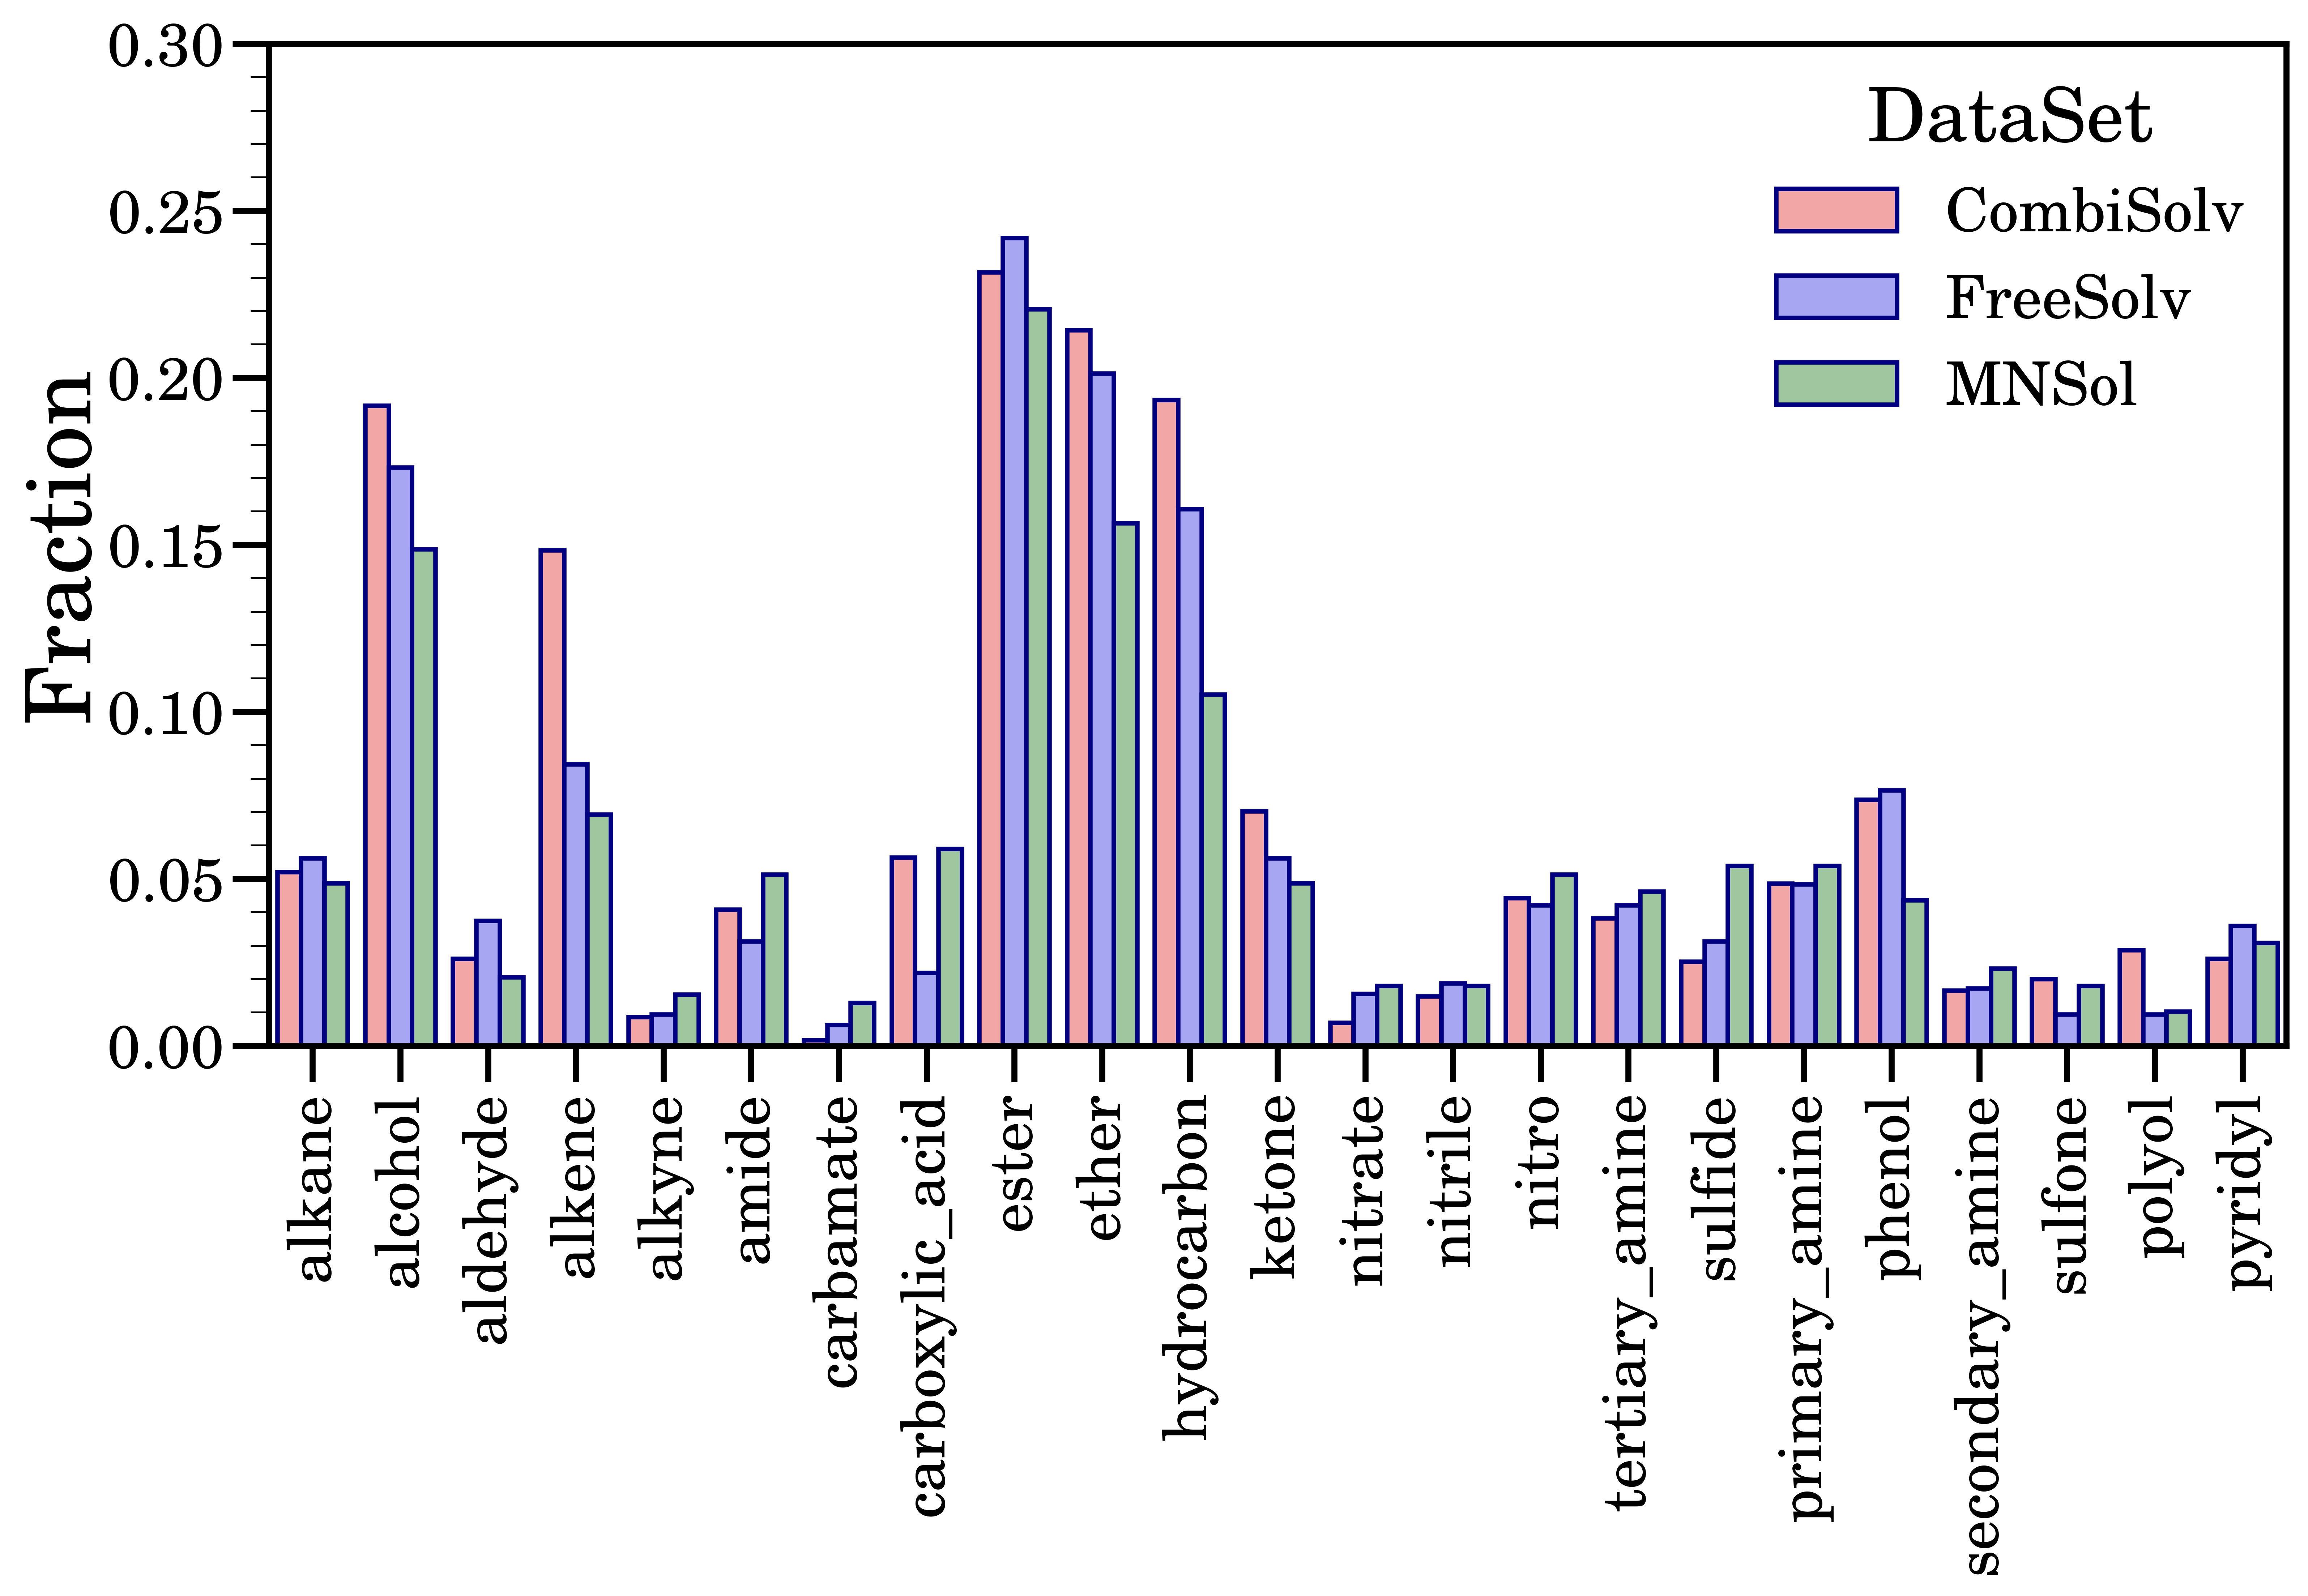

In [8]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=600)
sns.barplot(x="groups", y="height", hue="class", data=bar_plot_df,
            palette=["#ff9999", "#9999ff", "#99cc99"],
            alpha=1.0, edgecolor="navy", linewidth=1.5)
plt.xticks(rotation=90)
ax.set_ylabel("Fraction", fontsize=30)
ax.set_xlabel("")
ax.tick_params(which="minor", bottom=False)  # Hide minor xticks
ax.legend(title="DataSet", fontsize=20, title_fontsize=25)
plt.show()


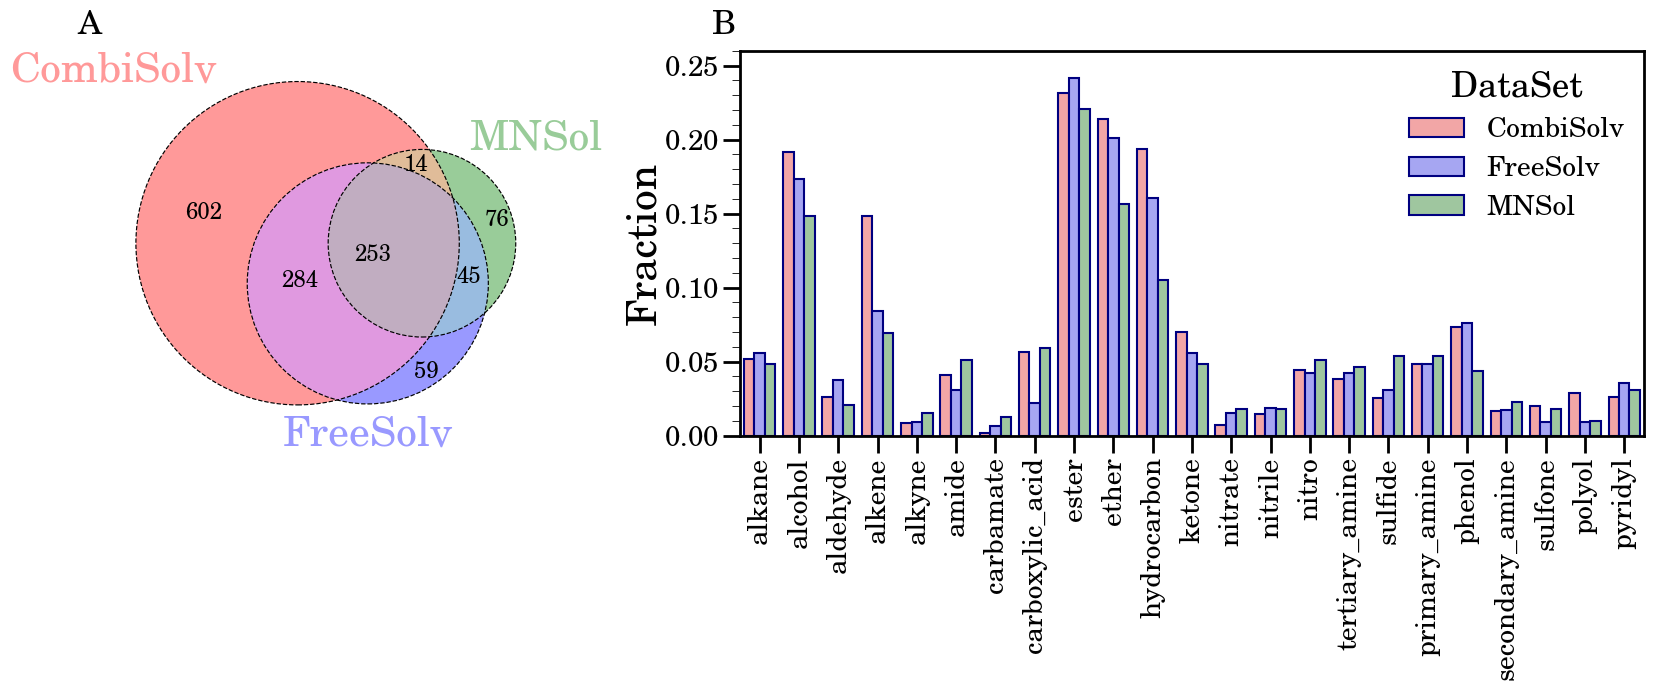

In [9]:
fig, axs = plt.subplot_mosaic([['A', 'B']], figsize=[18, 7], layout='tight')
for label, ax in axs.items():
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize=24, va='bottom', fontfamily='serif')
v = venn3([set1, set2, set3], ('CombiSolv', 'MNSol', 'FreeSolv'), ax=axs['A'])
c = venn3_circles([set1, set2, set3], linestyle='dashed', lw=0.85, ax=axs['A'])
v.get_label_by_id('C').set_size(30)
v.get_label_by_id('C').set_color("#9999ff")
v.get_label_by_id('B').set_size(30)
v.get_label_by_id('B').set_color("#99cc99")
v.get_label_by_id('A').set_size(30)
v.get_label_by_id('A').set_color("#ff9999")
for label in v.subset_labels:
    label.set_fontsize(16)
sns.barplot(x="groups", y="height", hue="class", data=bar_plot_df,
            palette=["#ff9999", "#9999ff", "#99cc99"],
            alpha=1.0, edgecolor="navy", linewidth=1.5, ax=axs['B'])
axs['B'].set_xticks(axs['B'].get_xticks())
axs['B'].set_xticklabels(labels=axs['B'].get_xticklabels(), rotation=90)
axs['B'].set_ylim([0, 0.26])
ax.set_ylabel("Fraction", fontsize=30)
ax.set_xlabel("")
ax.tick_params(which="minor", bottom=False)  # Hide minor xticks
ax.legend(title="DataSet", fontsize=20, title_fontsize=25)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0)
plt.savefig('Figure1.svg', dpi = 120)
